In [4]:
import pyspark


myConf = pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
        .builder\
        .master('local')\
        .appName('week6-prac')\
        .config(conf=myConf)\
        .getOrCreate()

21/10/09 11:22:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [6]:
myList = [('1', 'kim, js', 170),
          ('1', 'lee, sm', 175),
          ('2', 'lim, yg', 180),
          ('2', 'lee', 170)
         ]
myDf = spark.createDataFrame(myList)

In [7]:
myDf.columns

['_1', '_2', '_3']

In [8]:
myDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



In [12]:
myDf.show()

+---+-------+---+
| _1|     _2| _3|
+---+-------+---+
|  1|kim, js|170|
|  1|lee, sm|175|
|  2|lim, yg|180|
|  2|    lee|170|
+---+-------+---+



In [13]:
cols = ['year', 'name', 'height']
_myDf = spark.createDataFrame(myList, cols)
_myDf.columns

['year', 'name', 'height']

In [14]:
_myDf.show()

+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [16]:
names = ["kim", "lee", "lee", "lim"]
items = ["espresso","latte","americano","affocato","long black","macciato"]

coffeeDf = spark.createDataFrame([(names[i%4], items[i%4]) for i in range(100)], ["name", "coffee"])

In [17]:
coffeeDf.show()

+----+---------+
|name|   coffee|
+----+---------+
| kim| espresso|
| lee|    latte|
| lee|americano|
| lim| affocato|
| kim| espresso|
| lee|    latte|
| lee|americano|
| lim| affocato|
| kim| espresso|
| lee|    latte|
| lee|americano|
| lim| affocato|
| kim| espresso|
| lee|    latte|
| lee|americano|
| lim| affocato|
| kim| espresso|
| lee|    latte|
| lee|americano|
| lim| affocato|
+----+---------+
only showing top 20 rows



In [18]:
coffeeDf.printSchema()

root
 |-- name: string (nullable = true)
 |-- coffee: string (nullable = true)



In [20]:
from pyspark.sql import Row

Person = Row('year', 'name', 'height')
row1 = Person('1', 'kim, js', 170)

In [21]:
print(row1.year, row1.name, row1.height)

1 kim, js 170


In [22]:
print(row1.asDict())

{'year': '1', 'name': 'kim, js', 'height': 170}


In [23]:
myRows = [row1,
          Person('1', 'lee, sm', 175),
          Person('2', 'lim, yg', 180),
          Person('2', 'lee', 170)
         ]
myDf = spark.createDataFrame(myRows)
myDf.show()

+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [24]:
myDf.printSchema()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: long (nullable = true)



In [26]:
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType, IntegerType

mySchema = StructType([
    StructField("year", StringType(), True),
    StructField("name", StringType(), True),
    StructField("height", IntegerType(), True)
])

myDf = spark.createDataFrame(myRows, mySchema)
myDf.show()

+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [27]:
myDf.printSchema()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: integer (nullable = true)



In [28]:
myList=[('1','kim, js',170), ('1','lee, sm', 175), ('2','lim, yg',180), ('2','lee',170)]

In [29]:
myRdd = spark.sparkContext.parallelize(myList)

In [30]:
rddDf = myRdd.toDF()
rddDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



In [32]:
rddDf = spark.createDataFrame(myRdd)
rddDf.show()

+---+-------+---+
| _1|     _2| _3|
+---+-------+---+
|  1|kim, js|170|
|  1|lee, sm|175|
|  2|lim, yg|180|
|  2|    lee|170|
+---+-------+---+



In [35]:
from pyspark.sql import Row

_myRdd = myRdd.map(lambda x: Row(year=x[0], name=x[1], height=int(x[2])))
_myDf = spark.createDataFrame(_myRdd)
_myDf.show()


+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [40]:
import requests

r=requests.get("https://raw.githubusercontent.com/jokecamp/FootballData/master/World%20Cups/all-world-cup-players.json")
worldCupJson = r.json()
print(type(worldCupJson), type(worldCupJson[0]))
wc = worldCupJson

<class 'list'> <class 'dict'>


In [41]:
_wcDf = spark.createDataFrame(wc)

In [42]:
print(*myList)

('1', 'kim, js', 170) ('1', 'lee, sm', 175) ('2', 'lim, yg', 180) ('2', 'lee', 170)


In [56]:
wcDf = spark.createDataFrame(Row(**x) for x in wc)
wcDf.printSchema()

root
 |-- Competition: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Team: string (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)



In [57]:
wcDf.take(1)

[Row(Competition='World Cup', Year=1930, Team='Argentina', Number='', Position='GK', FullName='Ãngel Bossio', Club='Club AtlÃ©tico Talleres de Remedios de Escalada', ClubCountry='Argentina', DateOfBirth='1905-5-5', IsCaptain=False)]

In [58]:
wcDf.show()

+-----------+----+---------+------+--------+--------------------+--------------------+-----------+-----------+---------+
|Competition|Year|     Team|Number|Position|            FullName|                Club|ClubCountry|DateOfBirth|IsCaptain|
+-----------+----+---------+------+--------+--------------------+--------------------+-----------+-----------+---------+
|  World Cup|1930|Argentina|      |      GK|        Ãngel Bossio|Club AtlÃ©tico Ta...|  Argentina|   1905-5-5|    false|
|  World Cup|1930|Argentina|      |      GK|        Juan Botasso|Quilmes AtlÃ©tico...|  Argentina| 1908-10-23|    false|
|  World Cup|1930|Argentina|      |      FW|      Roberto Cherro|          Boca Junio|  Argentina|  1907-2-23|    false|
|  World Cup|1930|Argentina|      |      DF|   Alberto Chividini|Central Norte TucumÃ|  Argentina|  1907-2-23|    false|
|  World Cup|1930|Argentina|    10|      FW|                    |Club Atletico Est...|  Argentina|  1909-3-19|    false|
|  World Cup|1930|Argentina|    

In [60]:
from pyspark.sql.types import *

wcSchema = StructType([
    StructField("Club", StringType(), True),
    StructField("Clubcountry", StringType(), True),
    StructField("Competition", StringType(), True),
    StructField("DateOfBirth", DateType(), True),
    StructField("FullName", StringType(), True),
    StructField("IsCaptain", BooleanType(), True),
    StructField("Number", IntegerType(), True),
    StructField("Position", StringType(), True),
    StructField("Team", StringType(), True),
    StructField("Year", IntegerType(), True)
])

In [62]:
wcRdd = spark.sparkContext.parallelize(wc)
wcRdd.take(1)

21/10/09 13:14:22 WARN TaskSetManager: Stage 16 contains a task of very large size (1044 KiB). The maximum recommended task size is 1000 KiB.


[{'Competition': 'World Cup',
  'Year': 1930,
  'Team': 'Argentina',
  'Number': '',
  'Position': 'GK',
  'FullName': 'Ãngel Bossio',
  'Club': 'Club AtlÃ©tico Talleres de Remedios de Escalada',
  'ClubCountry': 'Argentina',
  'DateOfBirth': '1905-5-5',
  'IsCaptain': False}]

In [63]:
wcDfFromRdd = spark.createDataFrame(wcRdd)
wcDfFromRdd.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)



21/10/09 13:15:01 WARN TaskSetManager: Stage 17 contains a task of very large size (1044 KiB). The maximum recommended task size is 1000 KiB.


In [64]:
wcDfFromRdd.take(1)

21/10/09 13:15:16 WARN TaskSetManager: Stage 18 contains a task of very large size (1044 KiB). The maximum recommended task size is 1000 KiB.


[Row(Club='Club AtlÃ©tico Talleres de Remedios de Escalada', ClubCountry='Argentina', Competition='World Cup', DateOfBirth='1905-5-5', FullName='Ãngel Bossio', IsCaptain=False, Number='', Position='GK', Team='Argentina', Year=1930)]

In [65]:
cols = wcDf.columns
cols.remove('IsCaptain')

In [66]:
from pyspark.sql.functions import isnan, when, count, col

wcDf.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in cols]).show()

+-----------+----+----+------+--------+--------+----+-----------+-----------+
|Competition|Year|Team|Number|Position|FullName|Club|ClubCountry|DateOfBirth|
+-----------+----+----+------+--------+--------+----+-----------+-----------+
|          0|   0|   0|     0|       0|       0|   0|          0|          0|
+-----------+----+----+------+--------+--------+----+-----------+-----------+



In [67]:
wcDf.printSchema()

root
 |-- Competition: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Team: string (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)



In [72]:
from datetime import datetime

print(datetime.strptime("11/25/1991", "%m/%d/%Y"))

1991-11-25 00:00:00


In [78]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DateType

toDate = udf(lambda x: datetime.strptime(x, "%Y-%m-%d"), DateType())
wcDf = wcDf.withColumn("data1", toDate(wcDf["DateOfBirth"]))

In [79]:
wcDf.take(1)

21/10/09 14:44:49 ERROR Executor: Exception in task 0.0 in stage 23.0 (TID 23)
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/worker.py", line 604, in main
    process()
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/worker.py", line 596, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/serializers.py", line 211, in dump_stream
    self.serializer.dump_stream(self._batched(iterator), stream)
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/serializers.py", line 132, in dump_stream
    for obj in iterator:
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/serializers.py", line 200, in _batched
    for item in iterator:
  File "/opt/homebrew/Cellar/apache-spark/3.

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/worker.py", line 604, in main
    process()
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/worker.py", line 596, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/serializers.py", line 211, in dump_stream
    self.serializer.dump_stream(self._batched(iterator), stream)
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/serializers.py", line 132, in dump_stream
    for obj in iterator:
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/serializers.py", line 200, in _batched
    for item in iterator:
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/worker.py", line 450, in mapper
    result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/worker.py", line 450, in <genexpr>
    result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/worker.py", line 83, in <lambda>
    return lambda *a: toInternal(f(*a))
  File "/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/util.py", line 73, in wrapper
    return f(*args, **kwargs)
  File "/var/folders/l4/0n86l_692hx8xxqz3fqkk6mm0000gn/T/ipykernel_1794/641457198.py", line 4, in <lambda>
  File "/opt/anaconda3/envs/bigdata_analysis/lib/python3.8/_strptime.py", line 568, in _strptime_datetime
    tt, fraction, gmtoff_fraction = _strptime(data_string, format)
  File "/opt/anaconda3/envs/bigdata_analysis/lib/python3.8/_strptime.py", line 349, in _strptime
    raise ValueError("time data %r does not match format %r" %
ValueError: time data '' does not match format '%Y-%m-%d'


In [84]:
wcDf = wcDf.drop("data1")
wcDf.printSchema()

root
 |-- Competition: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Team: string (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)



In [98]:
from pyspark.sql.functions import to_date

_wcDfCasted = wcDf.withColumn("date2", to_date(wcDf["DateOfBirth"].cast(DateType())))
_wcDfCasted = wcDf.withColumn("date3", to_date(wcDf["DateOfBirth"], "yyyy-MM-dd"))

In [99]:
_wcDfCasted.printSchema()

root
 |-- Competition: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Team: string (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- date3: date (nullable = true)



In [100]:
_wcDfCasted.take(2)

[Row(Competition='World Cup', Year=1930, Team='Argentina', Number='', Position='GK', FullName='Ãngel Bossio', Club='Club AtlÃ©tico Talleres de Remedios de Escalada', ClubCountry='Argentina', DateOfBirth='1905-5-5', IsCaptain=False, date3=datetime.date(1905, 5, 5)),
 Row(Competition='World Cup', Year=1930, Team='Argentina', Number='', Position='GK', FullName='Juan Botasso', Club='Quilmes AtlÃ©tico Club', ClubCountry='Argentina', DateOfBirth='1908-10-23', IsCaptain=False, date3=datetime.date(1908, 10, 23))]

In [93]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")

DataFrame[key: string, value: string]

In [101]:
_myDf.printSchema()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: long (nullable = true)



In [102]:
_myDf.write.parquet("data/people.parquet")

In [103]:
_pDf = spark.read.parquet("data/people.parquet")
_pDf.show()

+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [106]:
spark.range(0, 10, 1).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
+---+



In [107]:
from pyspark.sql import functions as F
spark.range(10).select(F.current_date()).show()

+--------------+
|current_date()|
+--------------+
|    2021-10-09|
|    2021-10-09|
|    2021-10-09|
|    2021-10-09|
|    2021-10-09|
|    2021-10-09|
|    2021-10-09|
|    2021-10-09|
|    2021-10-09|
|    2021-10-09|
+--------------+



In [108]:
spark.range(10).select(F.unix_timestamp().alias("currenc_times")).show()

+-------------+
|currenc_times|
+-------------+
|   1633759274|
|   1633759274|
|   1633759274|
|   1633759274|
|   1633759274|
|   1633759274|
|   1633759274|
|   1633759274|
|   1633759274|
|   1633759274|
+-------------+



In [109]:
!ls data

WiredTiger
WiredTiger.lock
WiredTiger.turtle
WiredTiger.wt
WiredTigerHS.wt
_mdb_catalog.wt
_myDf.csv
assignmentWeek3.json
assignment_result.xml
collection-0--7581590572343549954.wt
collection-2--7581590572343549954.wt
collection-4--7581590572343549954.wt
diagnostic.data
ds_bigdata_wiki.txt
ds_open_hello.xml
ds_open_subwayTime.json
ds_spark.csv
ds_spark_2cols.csv
ds_spark_wiki.txt
ds_twiiter_seoul_3.json
images.jpeg
index-1--7581590572343549954.wt
index-3--7581590572343549954.wt
index-5--7581590572343549954.wt
index-6--7581590572343549954.wt
journal
key.properties
mongod.lock
myDf.csv
people.parquet
sizeStorer.wt
storage.bson
경기도 의정부시_인구현황_20210910.csv
제주특별자치도 서귀포시_고령화비율및노령화지수현황_20210831.csv


In [118]:
myDf = spark.read.format("com.databricks.spark.csv")\
    .options(header="true", inferschema="true")\
    .load("data/myDf.csv")

In [119]:
myDf.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Height: integer (nullable = true)



In [120]:
myDf.show()

+---+----+----+------+
|_c0|Year|Name|Height|
+---+----+----+------+
|  0|   1| Lee|   175|
|  1|   2| Lim|   180|
|  2|   2| Kim|   170|
+---+----+----+------+



21/10/09 15:08:34 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Year, Name, Height
 Schema: _c0, Year, Name, Height
Expected: _c0 but found: 
CSV file: file:///Users/joono/Desktop/joono/Bigdata-Analysis/data/myDf.csv


In [121]:
myDf = myDf.withColumn("nameUpper", uppercase(myDf.name))

NameError: name 'uppercase' is not defined

In [125]:
def uppercase(s):
    return s.upper()

upperUdf = udf(uppercase, StringType())
myDf = myDf.withColumn("nameUpper", upperUdf(myDf.Name))

In [126]:
myDf.show()

+---+----+----+------+---------+
|_c0|Year|Name|Height|nameUpper|
+---+----+----+------+---------+
|  0|   1| Lee|   175|      LEE|
|  1|   2| Lim|   180|      LIM|
|  2|   2| Kim|   170|      KIM|
+---+----+----+------+---------+



21/10/09 15:10:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Year, Name, Height
 Schema: _c0, Year, Name, Height
Expected: _c0 but found: 
CSV file: file:///Users/joono/Desktop/joono/Bigdata-Analysis/data/myDf.csv


In [128]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

toDoubleFunc = udf(lambda x: float(x), DoubleType())
myDf = myDf.withColumn("heightD", toDoubleFunc(myDf.Height))

In [129]:
myDf.show()

+---+----+----+------+---------+-------+
|_c0|Year|Name|Height|nameUpper|heightD|
+---+----+----+------+---------+-------+
|  0|   1| Lee|   175|      LEE|  175.0|
|  1|   2| Lim|   180|      LIM|  180.0|
|  2|   2| Kim|   170|      KIM|  170.0|
+---+----+----+------+---------+-------+



21/10/09 15:15:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Year, Name, Height
 Schema: _c0, Year, Name, Height
Expected: _c0 but found: 
CSV file: file:///Users/joono/Desktop/joono/Bigdata-Analysis/data/myDf.csv


In [130]:
tDf

NameError: name 'tDf' is not defined

In [132]:
%%writefile data/ds_spark_heightweights.txt
1	65.78	112.99
2	71.52	136.49
3	69.40	153.03
4	68.22	142.34
5	67.79	144.30
6	68.70	123.30
7	69.80	141.49
8	70.01	136.46
9	67.90	112.37
10	66.78	120.67
11	66.49	127.45
12	67.62	114.14
13	68.30	125.61
14	67.12	122.46
15	68.28	116.09
16	71.09	140.00
17	66.46	129.50
18	68.65	142.97
19	71.23	137.90
20	67.13	124.04
21	67.83	141.28
22	68.88	143.54
23	63.48	97.90
24	68.42	129.50
25	67.63	141.85
26	67.21	129.72
27	70.84	142.42
28	67.49	131.55
29	66.53	108.33
30	65.44	113.89
31	69.52	103.30
32	65.81	120.75
33	67.82	125.79
34	70.60	136.22
35	71.80	140.10
36	69.21	128.75
37	66.80	141.80
38	67.66	121.23
39	67.81	131.35
40	64.05	106.71
41	68.57	124.36
42	65.18	124.86
43	69.66	139.67
44	67.97	137.37
45	65.98	106.45
46	68.67	128.76
47	66.88	145.68
48	67.70	116.82
49	69.82	143.62
50	69.09	134.93

Writing data/ds_spark_heightweights.txt


In [133]:
from pyspark.sql.types import *

_tRdd = spark.sparkContext.textFile("data/ds_spark_heightweights.txt")

In [134]:
_tRddSplitted = _tRdd.map(lambda x: x.split())

In [136]:
_tRddSplitted.collect()

[['1', '65.78', '112.99'],
 ['2', '71.52', '136.49'],
 ['3', '69.40', '153.03'],
 ['4', '68.22', '142.34'],
 ['5', '67.79', '144.30'],
 ['6', '68.70', '123.30'],
 ['7', '69.80', '141.49'],
 ['8', '70.01', '136.46'],
 ['9', '67.90', '112.37'],
 ['10', '66.78', '120.67'],
 ['11', '66.49', '127.45'],
 ['12', '67.62', '114.14'],
 ['13', '68.30', '125.61'],
 ['14', '67.12', '122.46'],
 ['15', '68.28', '116.09'],
 ['16', '71.09', '140.00'],
 ['17', '66.46', '129.50'],
 ['18', '68.65', '142.97'],
 ['19', '71.23', '137.90'],
 ['20', '67.13', '124.04'],
 ['21', '67.83', '141.28'],
 ['22', '68.88', '143.54'],
 ['23', '63.48', '97.90'],
 ['24', '68.42', '129.50'],
 ['25', '67.63', '141.85'],
 ['26', '67.21', '129.72'],
 ['27', '70.84', '142.42'],
 ['28', '67.49', '131.55'],
 ['29', '66.53', '108.33'],
 ['30', '65.44', '113.89'],
 ['31', '69.52', '103.30'],
 ['32', '65.81', '120.75'],
 ['33', '67.82', '125.79'],
 ['34', '70.60', '136.22'],
 ['35', '71.80', '140.10'],
 ['36', '69.21', '128.75'],
 [

In [153]:
mySchema = StructType([
    StructField("id", DoubleType(), True),
    StructField("weight", DoubleType(), True),
    StructField("height", DoubleType(), True)
])

In [141]:
tDfNamed = spark.createDataFrame(_tRddSplitted, mySchema)

In [148]:
tRdd = _tRdd.map(lambda line: [float(x) for x in line.split('\t')])
tRdd.take(1)

[[1.0, 65.78, 112.99]]

In [154]:
tDf = spark.createDataFrame(tRdd, mySchema)

In [155]:
tDf.show()

+----+------+------+
|  id|weight|height|
+----+------+------+
| 1.0| 65.78|112.99|
| 2.0| 71.52|136.49|
| 3.0|  69.4|153.03|
| 4.0| 68.22|142.34|
| 5.0| 67.79| 144.3|
| 6.0|  68.7| 123.3|
| 7.0|  69.8|141.49|
| 8.0| 70.01|136.46|
| 9.0|  67.9|112.37|
|10.0| 66.78|120.67|
|11.0| 66.49|127.45|
|12.0| 67.62|114.14|
|13.0|  68.3|125.61|
|14.0| 67.12|122.46|
|15.0| 68.28|116.09|
|16.0| 71.09| 140.0|
|17.0| 66.46| 129.5|
|18.0| 68.65|142.97|
|19.0| 71.23| 137.9|
|20.0| 67.13|124.04|
+----+------+------+
only showing top 20 rows



In [156]:
tDftxt = spark.read.text("data/ds_spark_heightweights.txt")
tDftxt.show()

+---------------+
|          value|
+---------------+
| 1	65.78	112.99|
| 2	71.52	136.49|
| 3	69.40	153.03|
| 4	68.22	142.34|
| 5	67.79	144.30|
| 6	68.70	123.30|
| 7	69.80	141.49|
| 8	70.01	136.46|
| 9	67.90	112.37|
|10	66.78	120.67|
|11	66.49	127.45|
|12	67.62	114.14|
|13	68.30	125.61|
|14	67.12	122.46|
|15	68.28	116.09|
|16	71.09	140.00|
|17	66.46	129.50|
|18	68.65	142.97|
|19	71.23	137.90|
|20	67.13	124.04|
+---------------+
only showing top 20 rows



In [157]:
from pyspark.sql.functions import split

split_col = split(tDftxt['value'], '\t')

In [158]:
tDftxt = tDftxt.withColumn('weight', split_col.getItem(1))
tDftxt = tDftxt.withColumn('height', split_col.getItem(2))

In [159]:
tDftxt.show()

+---------------+------+------+
|          value|weight|height|
+---------------+------+------+
| 1	65.78	112.99| 65.78|112.99|
| 2	71.52	136.49| 71.52|136.49|
| 3	69.40	153.03| 69.40|153.03|
| 4	68.22	142.34| 68.22|142.34|
| 5	67.79	144.30| 67.79|144.30|
| 6	68.70	123.30| 68.70|123.30|
| 7	69.80	141.49| 69.80|141.49|
| 8	70.01	136.46| 70.01|136.46|
| 9	67.90	112.37| 67.90|112.37|
|10	66.78	120.67| 66.78|120.67|
|11	66.49	127.45| 66.49|127.45|
|12	67.62	114.14| 67.62|114.14|
|13	68.30	125.61| 68.30|125.61|
|14	67.12	122.46| 67.12|122.46|
|15	68.28	116.09| 68.28|116.09|
|16	71.09	140.00| 71.09|140.00|
|17	66.46	129.50| 66.46|129.50|
|18	68.65	142.97| 68.65|142.97|
|19	71.23	137.90| 71.23|137.90|
|20	67.13	124.04| 67.13|124.04|
+---------------+------+------+
only showing top 20 rows



In [162]:
_weightRdd = tDf.rdd.map(lambda fields: fields[1]).collect()
_heightRdd = tDf.rdd.map(lambda fields: fields[2]).collect()

In [163]:
import numpy as np
print(np.array(_weightRdd))
print(np.array(_heightRdd))

[65.78 71.52 69.4  68.22 67.79 68.7  69.8  70.01 67.9  66.78 66.49 67.62
 68.3  67.12 68.28 71.09 66.46 68.65 71.23 67.13 67.83 68.88 63.48 68.42
 67.63 67.21 70.84 67.49 66.53 65.44 69.52 65.81 67.82 70.6  71.8  69.21
 66.8  67.66 67.81 64.05 68.57 65.18 69.66 67.97 65.98 68.67 66.88 67.7
 69.82 69.09]
[112.99 136.49 153.03 142.34 144.3  123.3  141.49 136.46 112.37 120.67
 127.45 114.14 125.61 122.46 116.09 140.   129.5  142.97 137.9  124.04
 141.28 143.54  97.9  129.5  141.85 129.72 142.42 131.55 108.33 113.89
 103.3  120.75 125.79 136.22 140.1  128.75 141.8  121.23 131.35 106.71
 124.36 124.86 139.67 137.37 106.45 128.76 145.68 116.82 143.62 134.93]


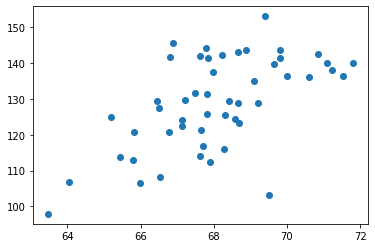

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.array(_weightRdd), np.array(_heightRdd), 'o')
plt.show()

In [165]:
height = tDf.select("height").toPandas()
height.describe()

,height
count,50.000000
mean,128.842000
std,12.888889
min,97.900000
25%,120.870000
50%,129.500000
75%,140.075000
max,153.030000


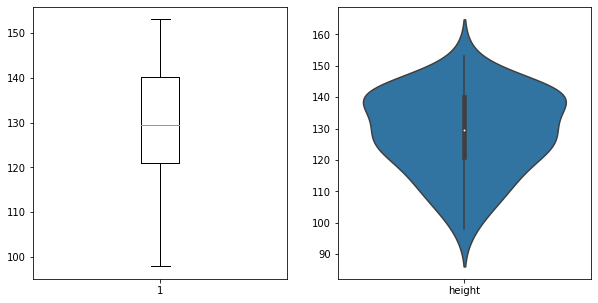

In [169]:
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = plt.boxplot(height)

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.violinplot(data=height)

In [170]:
tDf.agg({"height": "count"}).show()

+-------------+
|count(height)|
+-------------+
|           50|
+-------------+



In [173]:
tDf.agg({"height": "avg"}).show()

+-----------+
|avg(height)|
+-----------+
|    128.842|
+-----------+



In [174]:
from pyspark.sql import functions as F
tDf.agg(F.min("height")).show()

+-----------+
|min(height)|
+-----------+
|       97.9|
+-----------+

